In [23]:
import pandas as pd
import numpy as np

In [24]:
data=pd.read_csv('IEA Global EV Data 2024.csv', index_col=0)
display(data.head(10))
display(data.info())
display(data.shape)

,category,parameter,mode,powertrain,year,unit,value
region,,,,,,,
Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000


<class 'pandas.core.frame.DataFrame'>
Index: 12654 entries, Australia to World
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    12654 non-null  object 
 1   parameter   12654 non-null  object 
 2   mode        12654 non-null  object 
 3   powertrain  12654 non-null  object 
 4   year        12654 non-null  int64  
 5   unit        12654 non-null  object 
 6   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 790.9+ KB


None

(12654, 7)

In [25]:
display(data.year.unique())

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010, 2025, 2030, 2035])

In [26]:
data.reset_index(inplace=True)

In [27]:
display(data.head())
display(data.region.unique())

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

Analyzing Electric Vehicle Data

In [28]:
vehicles=data.loc[data['unit']=='Vehicles']
display(vehicles.head())
display(vehicles.shape)
display(vehicles.describe())

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


(6842, 8)

,year,value
count,6842.000000,6.842000e+03
mean,2019.883221,7.503803e+05
std,5.352174,9.307153e+06
min,2010.000000,1.000000e-03
25%,2016.000000,6.725000e+01
50%,2020.000000,1.200000e+03
75%,2022.000000,2.200000e+04
max,2035.000000,4.400000e+08


,count
mode,
Cars,2975
Buses,1485
Vans,1449
Trucks,933


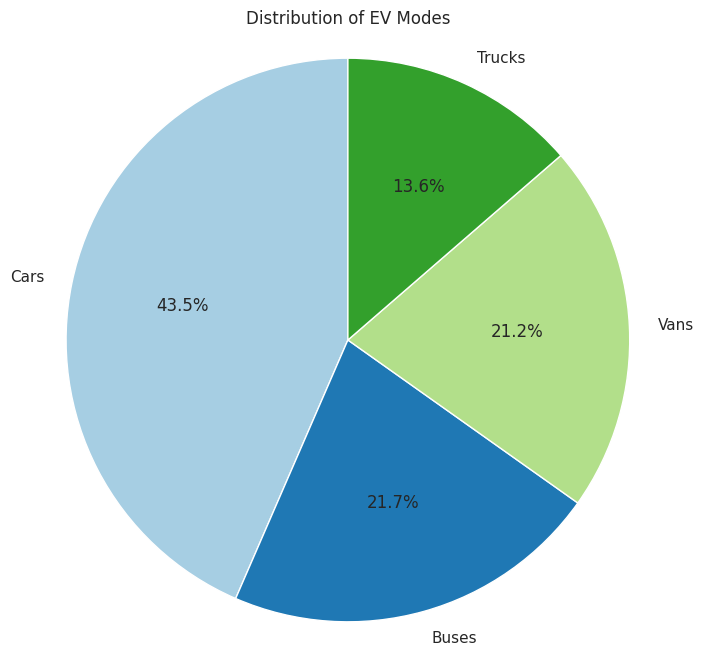

In [29]:
mode=vehicles['mode'].value_counts()
display(mode)

import matplotlib.pyplot as plt

mode_counts = vehicles['mode'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of EV Modes')
plt.axis('equal')
plt.show()

Minimum and Maximum Values in the Dataset

In [30]:
min_index=vehicles['value'].idxmin()
min_row=vehicles.loc[min_index]

print(min_row)

region            Israel
category      Historical
parameter       EV sales
mode               Buses
powertrain           BEV
year                2013
unit            Vehicles
value              0.001
Name: 6151, dtype: object


In [31]:
max_index=vehicles['value'].idxmax()
max_row=vehicles.loc[max_index]

print(max_row)

region                 World
category      Projection-APS
parameter           EV stock
mode                    Cars
powertrain               BEV
year                    2035
unit                Vehicles
value            440000000.0
Name: 12609, dtype: object


Data Processing

In [32]:
# # Group the data by region and calculate the sum of the 'value' column
vehicles_countries_grouped = vehicles.groupby('region')['value'].sum()

vehicles_countries_df = pd.DataFrame(vehicles_countries_grouped).reset_index()

vehicles_countries_df.columns = ['region', 'total_value']

vehicles_countries_df = vehicles_countries_df[vehicles_countries_df['region'] != 'World']

print(vehicles_countries_df)

                  region   total_value
0              Australia  5.788320e+05
1                Austria  8.719660e+05
2                Belgium  1.687010e+06
3                 Brazil  2.649470e+05
4               Bulgaria  4.623000e+03
5                 Canada  2.416440e+06
6                  Chile  1.445800e+04
7                  China  1.148052e+09
8               Colombia  1.602300e+04
9             Costa Rica  2.763100e+04
10               Croatia  7.557000e+03
11                Cyprus  2.260000e+03
12        Czech Republic  3.430000e+04
13               Denmark  1.102561e+06
14                  EU27  3.324256e+07
15               Estonia  4.585000e+03
16                Europe  5.937754e+08
17               Finland  7.427230e+05
18                France  6.787772e+06
19               Germany  1.020111e+07
20                Greece  1.053560e+05
21               Hungary  4.203500e+04
22               Iceland  1.897660e+05
23                 India  6.341878e+07
24               Ireland 

Data Visualization

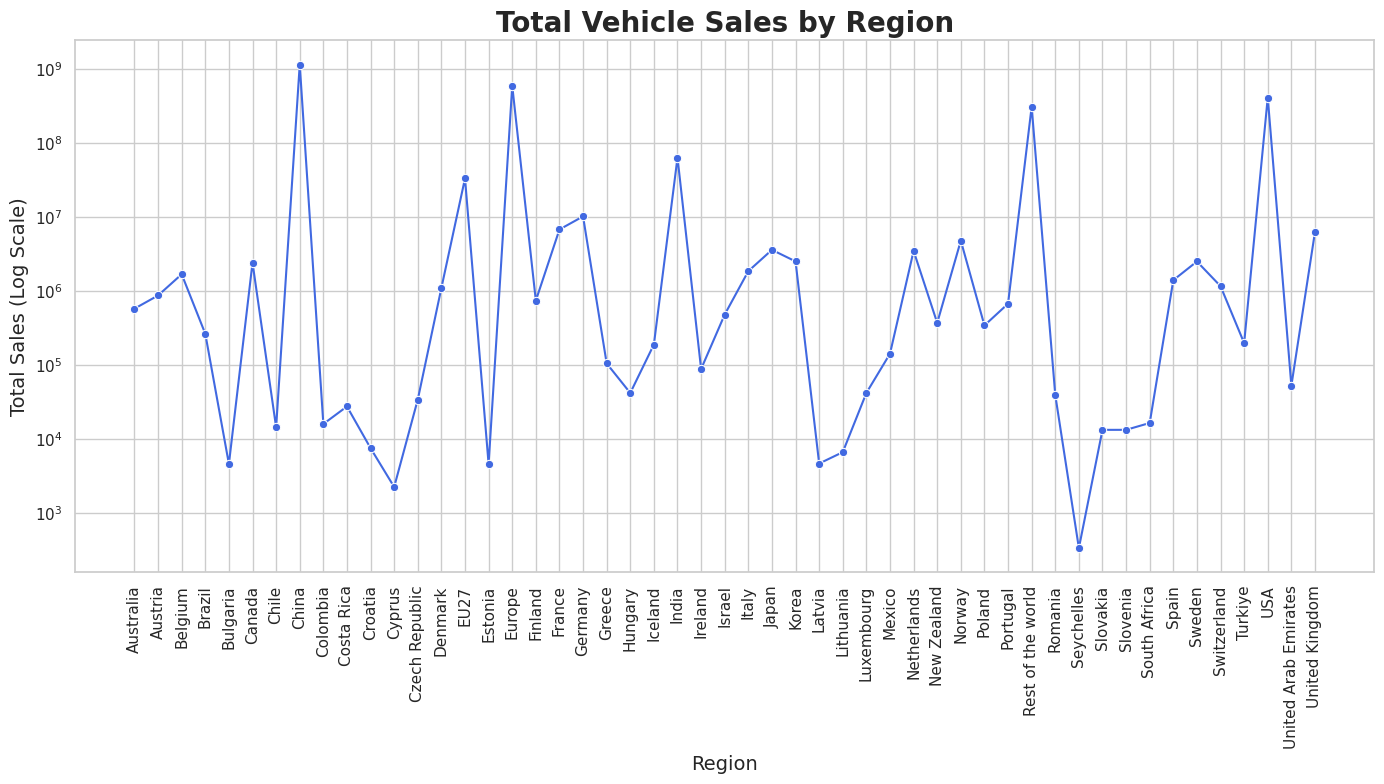

In [33]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.lineplot(data=vehicles_countries_df, x='region', y='total_value', marker='o', color='royalblue')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales (Log Scale)', fontsize=14)

plt.yscale('log')

plt.tight_layout()
plt.show()

<ipython-input-34-18c3bb6438a3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicles_countries_df, x='region', y='total_value', palette="viridis")


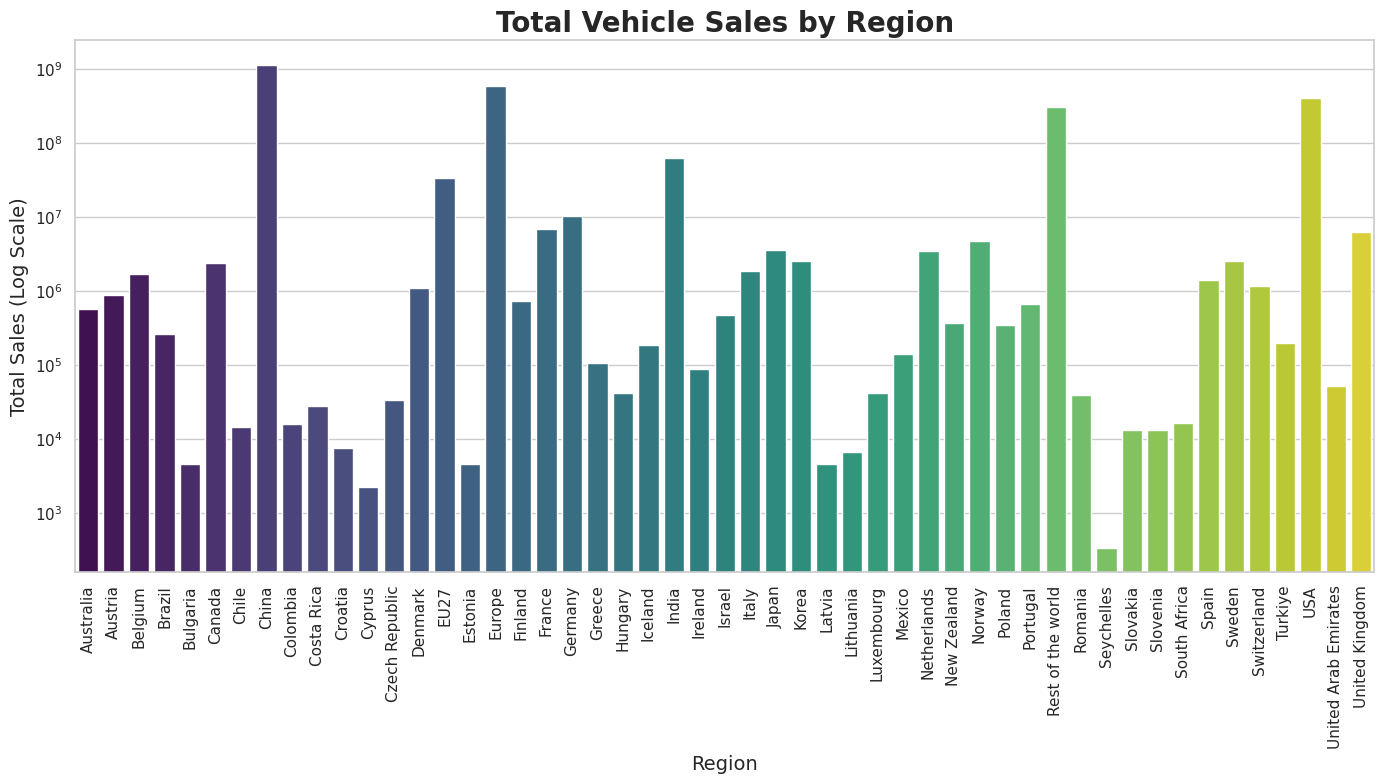

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.barplot(data=vehicles_countries_df, x='region', y='total_value', palette="viridis")

plt.xticks(rotation=90)
plt.title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales (Log Scale)', fontsize=14)

plt.yscale('log')

plt.tight_layout()
plt.show()

Line and Bar Charts
The line chart and bar chart together provide a comprehensive view of the global distribution of total electric vehicle (EV) sales across various regions. Both charts highlight the differences in market size and EV adoption between different countries and regions, offering valuable insights into the global landscape of clean transportation.

In [35]:
# Get the index of the row with the maximum value in 'total_value'
max_sales_index = vehicles_countries_df['total_value'].idxmax()

best_seller_country = vehicles_countries_df.loc[max_sales_index, 'region']

# Sort the DataFrame by 'total_value' in descending order and select the top 10 countries
top_10_countries = vehicles_countries_df.nlargest(10, 'total_value')

display(top_10_countries[['region', 'total_value']])

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06
35,Norway,4.793634e+06


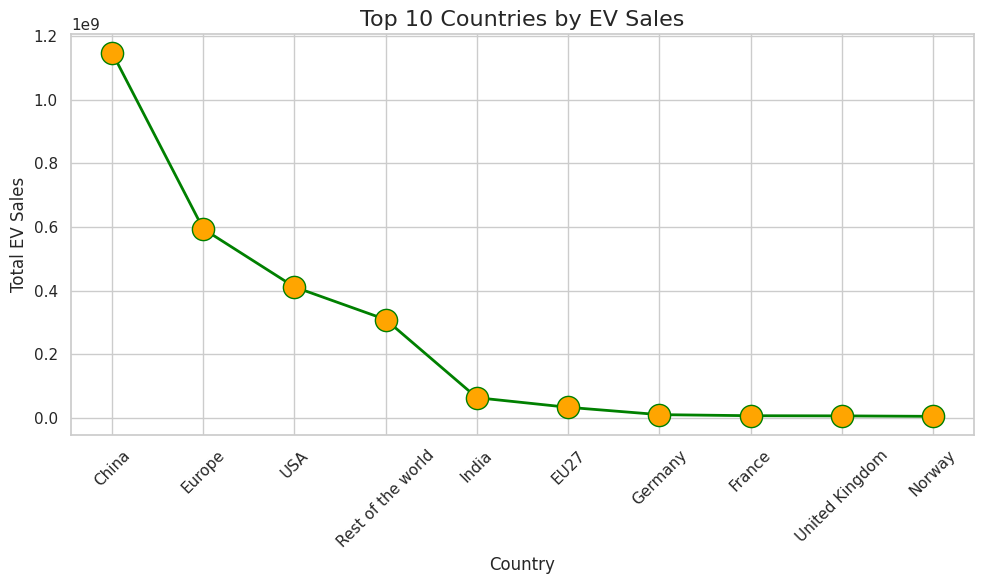

In [36]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sorted_top_10 = top_10_countries.sort_values('total_value', ascending=False)

plt.plot(
    sorted_top_10['region'],
    sorted_top_10['total_value'],
    marker='o',
    color='green',
    markerfacecolor='orange',
    linestyle='-',
    linewidth=2,
    markersize=16
)
plt.title('Top 10 Countries by EV Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Line Chart on Countries Selling the Most EVs

In [37]:
min_sales_index = vehicles_countries_df['total_value'].idxmin()

least_country = vehicles_countries_df.loc[min_sales_index, 'region']

bottom_10_countries = vehicles_countries_df.nsmallest(10, 'total_value')

display(bottom_10_countries[['region', 'total_value']])

,region,total_value
40,Seychelles,338.0
11,Cyprus,2260.0
15,Estonia,4585.0
4,Bulgaria,4623.0
29,Latvia,4687.0
30,Lithuania,6673.0
10,Croatia,7557.0
41,Slovakia,13351.0
42,Slovenia,13363.0
6,Chile,14458.0


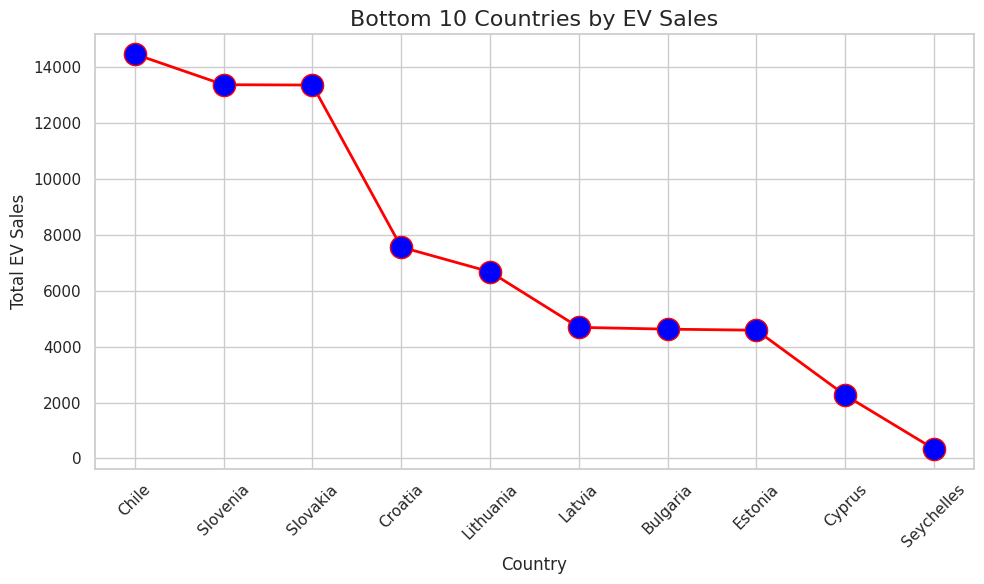

In [43]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sorted_top_10 = bottom_10_countries.sort_values('total_value', ascending=False)

plt.plot(
    sorted_top_10['region'],
    sorted_top_10['total_value'],
    marker='o',
    color='red',
    markerfacecolor='blue',
    linestyle='-',
    linewidth=2,
    markersize=16
)
plt.title('Bottom 10 Countries by EV Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Line Chart on Countries Selling the Least EVs

In [39]:
top_5_countries = vehicles_countries_df.nlargest(5, 'total_value')

bottom_5_countries = vehicles_countries_df.nsmallest(5, 'total_value')

top_and_bottom_countries = pd.concat([top_5_countries, bottom_5_countries])

display(top_and_bottom_countries[['region', 'total_value']])

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
40,Seychelles,3.380000e+02
11,Cyprus,2.260000e+03
15,Estonia,4.585000e+03
4,Bulgaria,4.623000e+03
29,Latvia,4.687000e+03


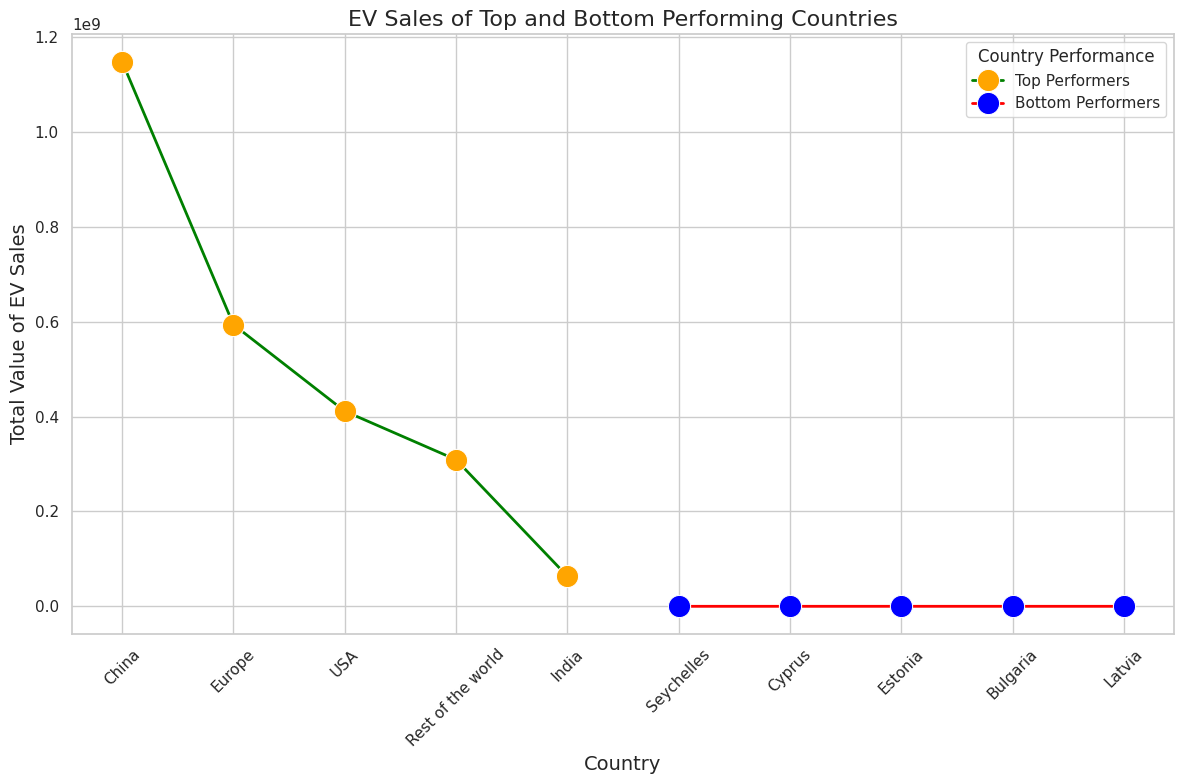

In [40]:
top_countries = top_and_bottom_countries.iloc[:5]
bottom_countries = top_and_bottom_countries.iloc[5:]

plt.figure(figsize=(12, 8))

sns.lineplot(data=top_countries, x='region', y='total_value', marker='o', color='green', markerfacecolor='orange', markersize=16, label='Top Performers', linewidth=2)

sns.lineplot(data=bottom_countries, x='region', y='total_value', marker='o', color='red', markerfacecolor='blue', markersize=16, label='Bottom Performers', linewidth=2)

plt.title('EV Sales of Top and Bottom Performing Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Value of EV Sales', fontsize=14)

plt.xticks(rotation=45)
plt.legend(title='Country Performance')

plt.tight_layout()
plt.show()

Model building using K-means Clustering

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = vehicles_countries_df[['total_value']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

vehicles_countries_df['cluster'] = kmeans.labels_

print(vehicles_countries_df.head())
display(kmeans.labels_)

      region  total_value  cluster
0  Australia     578832.0        0
1    Austria     871966.0        0
2    Belgium    1687010.0        0
3     Brazil     264947.0        0
4   Bulgaria       4623.0        0


array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int32)

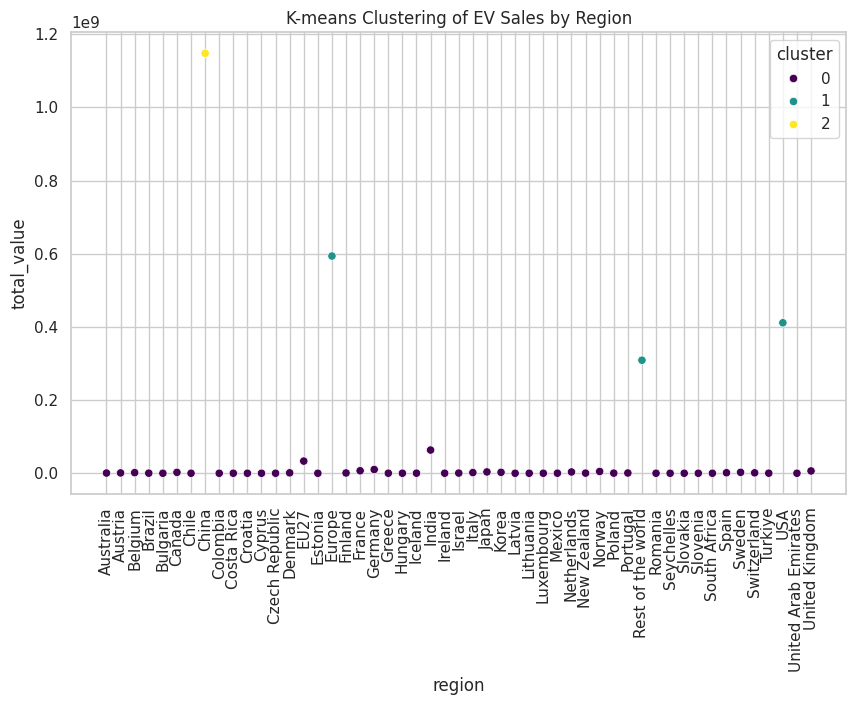

In [58]:
# plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='region', y='total_value', hue='cluster', data=vehicles_countries_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('K-means Clustering of EV Sales by Region')
plt.show()